In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
nifty_data = yf.download('^NSEI', start='2010-01-01', end='2022-01-01')

/tmp/ipython-input-1939372991.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download('^NSEI', start='2010-01-01', end='2022-01-01')
[*********************100%***********************]  1 of 1 completed


In [25]:
nifty_data = nifty_data[['Close']].dropna()

In [26]:
nifty_data = nifty_data.reset_index()

In [27]:
nifty_data['Days'] = (nifty_data['Date'] - nifty_data['Date'].min()).dt.days

In [28]:
train, test = train_test_split(nifty_data, test_size=0.2, shuffle=False)

In [29]:
X_train = train[['Days']]
y_train = train['Close']

X_test = test[['Days']]
y_test = test['Close']

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6885528.931000548


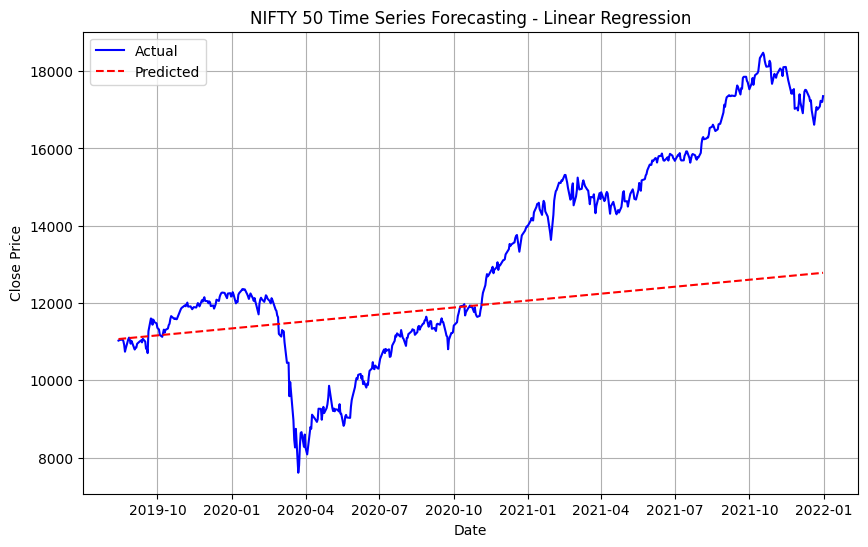

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual', color='blue')
plt.plot(test['Date'], y_pred, label='Predicted', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NIFTY 50 Time Series Forecasting - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()